# Devanagari Character Recognition using Convolutional Neural Networks

Train a CNN to classify images from Devanagari Character Set (over 92 thousand images of characters from devanagari script)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
dataset = pd.read_csv("input_files/data.csv")
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [2]:
from sklearn.model_selection import train_test_split

imageWidth = 32
imageHeight = 32
imageDepth = 1;

X = dataset.iloc[:,:-1]
X = X.values.reshape(X.shape[0], imageWidth, imageHeight, imageDepth)

y = dataset['character'].values

# Rescale the Images by Dividing Every Pixel in Every Image by 255
# rescale [0,255] --> [0,1]
X = X.astype('float32')/255

# Get the output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y)

### Split data into training, validation, test sets (80/10/10)

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=99)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=99)

print("The training set has %d samples." % len(X_train))
print("The validation set has %d samples." % len(X_val))
print("The test set has %d samples." % len(X_test))

The training set has 73600 samples.
The validation set has 9200 samples.
The test set has 9200 samples.


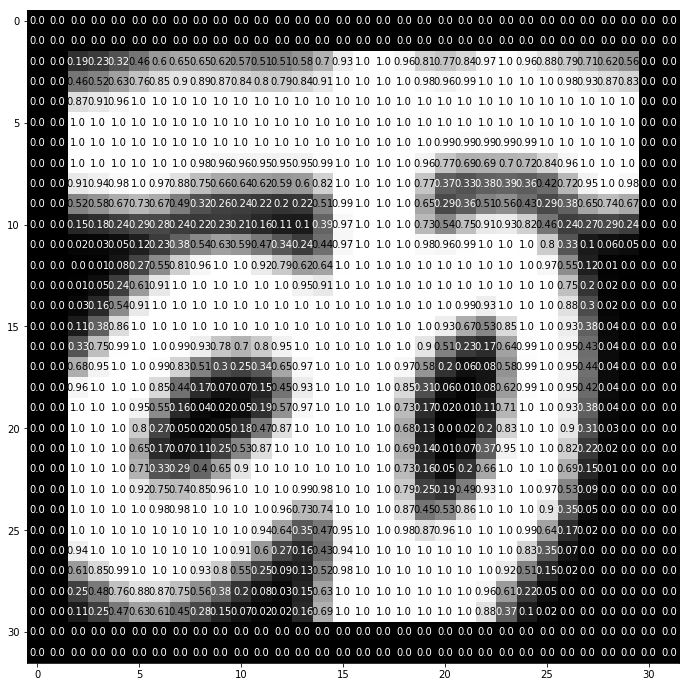

In [13]:
# Visualize a Image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xImages = X.reshape(X.shape[0], imageWidth, imageHeight)

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(xImages[0], ax)


In [5]:
# Print some training labels
print(y[0])
print(y[50000])
print(y[91000])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the Model Architecture
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(imageWidth, imageHeight, imageDepth)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(46, activation='softmax'))

# summarize the model
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         32896     
__________

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Save the model craeting a HDF5 file
from keras.models import load_model
model.save('saved_models/devanagari_model.hdf5') 

In [8]:
# Calculate the Classification Accuracy on the Test Set (Before Training)
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 2.0217%


Epoch 00000: val_loss improved from inf to 0.40274, saving model to saved_models/model_best_weights.hdf5
Epoch 00001: val_loss improved from 0.40274 to 0.19170, saving model to saved_models/model_best_weights.hdf5
Epoch 00002: val_loss improved from 0.19170 to 0.11582, saving model to saved_models/model_best_weights.hdf5
Epoch 00003: val_loss improved from 0.11582 to 0.09715, saving model to saved_models/model_best_weights.hdf5
Epoch 00004: val_loss improved from 0.09715 to 0.08085, saving model to saved_models/model_best_weights.hdf5
Epoch 00005: val_loss improved from 0.08085 to 0.07177, saving model to saved_models/model_best_weights.hdf5
Epoch 00006: val_loss improved from 0.07177 to 0.06374, saving model to saved_models/model_best_weights.hdf5
Epoch 00007: val_loss improved from 0.06374 to 0.06098, saving model to saved_models/model_best_weights.hdf5
Epoch 00008: val_loss improved from 0.06098 to 0.05631, saving model to saved_models/model_best_weights.hdf5
Epoch 00009: val_loss i

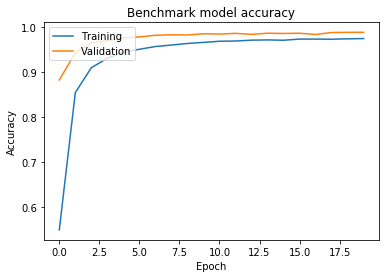

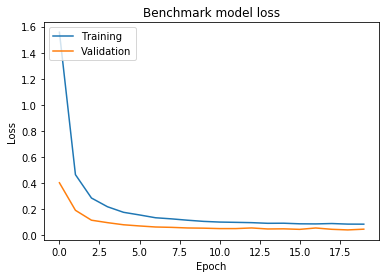

In [9]:
from keras.callbacks import ModelCheckpoint   
batch_size = 128
epochs = 20

# train the model
checkpointer = ModelCheckpoint(filepath='saved_models/model_best_weights.hdf5', 
                               verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0,
                    validation_data=(X_val, y_val),                     
                    callbacks=[checkpointer])

# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Benchmark model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.savefig('plots/accuracy.pdf', bbox_inches='tight')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Benchmark model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.savefig('plots/loss.pdf', bbox_inches='tight')
plt.show()

In [10]:
# Load the Model with the Best Classification Accuracy on the Validation Set
model.load_weights('saved_models/model_best_weights.hdf5')

In [11]:
# Calculate the Classification Accuracy on the Test Set
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.5761%
